In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

2024-11-13 19:53:07.809949: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pip install tensorflow-datasets


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 26s 0us/step


In [4]:
class_labels = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

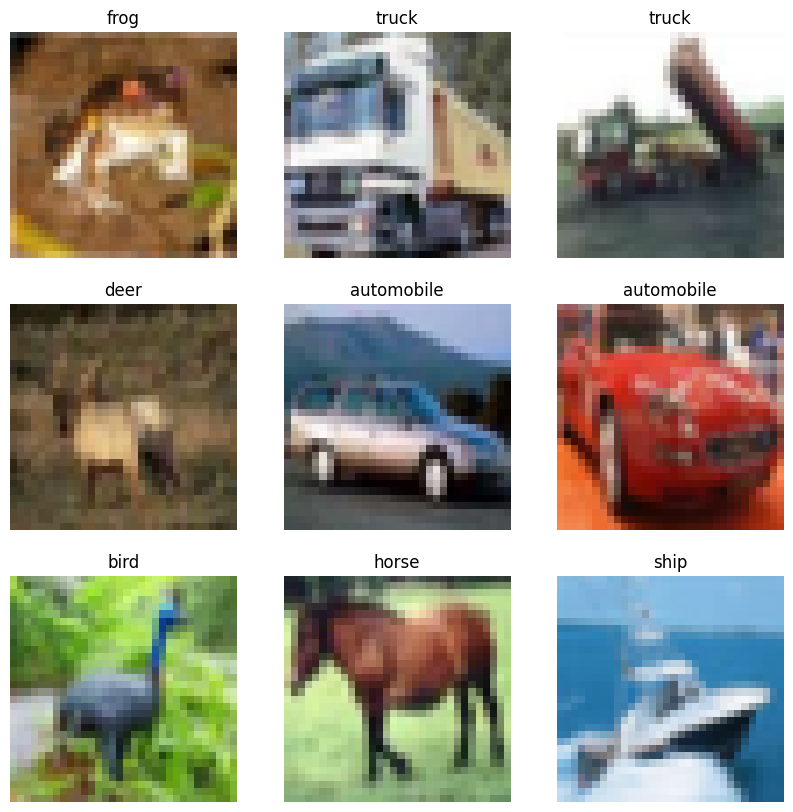

In [5]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
class_labels = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

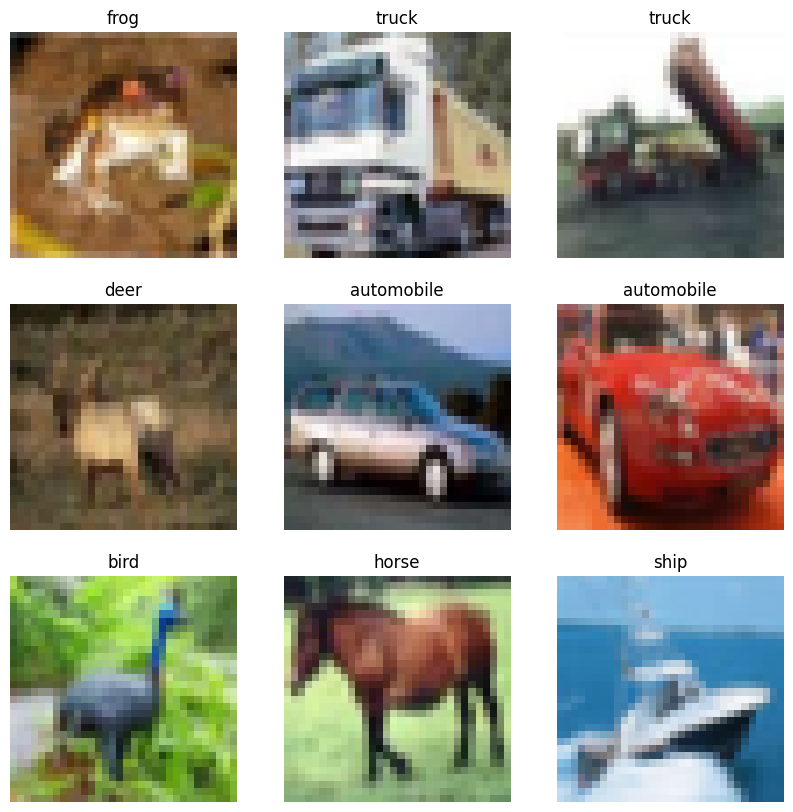

In [9]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_labels[y_train[i][0]])
    plt.axis('off')
plt.show()

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

In [11]:
import tensorflow as tf

In [12]:
custom_model = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(10, activation='softmax')
     ]
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
custom_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = custom_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.3840 - loss: 1.6732 - val_accuracy: 0.5627 - val_loss: 1.2164
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6076 - loss: 1.1121 - val_accuracy: 0.6604 - val_loss: 0.9610
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 25ms/step - accuracy: 0.6810 - loss: 0.9120 - val_accuracy: 0.6975 - val_loss: 0.8738
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.7233 - loss: 0.7829 - val_accuracy: 0.7083 - val_loss: 0.8417
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7605 - loss: 0.6821 - val_accuracy: 0.7032 - val_loss: 0.8872
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7886 - loss: 0.5966 - val_accuracy: 0.7186 - val_loss: 0.8357
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.8153 - loss: 0.5255 - val_accuracy: 0.7197 - val_loss: 0.8729
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.8387 -

In [16]:
test_loss, test_accuracy = custom_model.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7138 - loss: 1.0030
1.0161423683166504 0.7073000073432922


In [17]:
alexnet = tf.keras.Sequential([
    tf.keras.layers.Conv2D(48, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(192,(3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(192,(3,3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        55,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,450 (15.22 MB)

 Trainable params: 3,989,450 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
alexnet_history = alexnet.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 283ms/step - accuracy: 0.2845 - loss: 1.8762 - val_accuracy: 0.5299 - val_loss: 1.2881
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 224s 286ms/step - accuracy: 0.5559 - loss: 1.2326 - val_accuracy: 0.6191 - val_loss: 1.0902
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 235s 300ms/step - accuracy: 0.6551 - loss: 0.9808 - val_accuracy: 0.6965 - val_loss: 0.8601
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 235s 300ms/step - accuracy: 0.7151 - loss: 0.8188 - val_accuracy: 0.7032 - val_loss: 0.8593
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 230s 294ms/step - accuracy: 0.7488 - loss: 0.7297 - val_accuracy: 0.7063 - val_loss: 0.8550
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 253s 323ms/step - accuracy: 0.7762 - loss: 0.6413 - val_accuracy: 0.7401 - val_loss: 0.7731
Epoch 7/10
308/782 ━━━━━━━━━━━━━━━━━━━━ 2:07 269ms/step - accuracy: 0.8087 - loss: 0.5480

KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# resizing step
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

x_train_resized, x_test_resized = x_train_resized/255.0, x_test_resized/255.0

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [ ]:
test_loss, test_accuracy = alexnet.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

In [ ]:
from tensorflow.keras.applications import VGG16
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# resizing step
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

x_train_resized, x_test_resized = x_train_resized/255.0, x_test_resized/255.0

base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# resizing step
x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

x_train_resized, x_test_resized = x_train_resized/255.0, x_test_resized/255.0

base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess and augment data with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    preprocessing_function=lambda img: tf.image.resize(img, [224, 224])
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    preprocessing_function=lambda img: tf.image.resize(img, [224, 224])
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [ ]:
base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224,224,3))

In [ ]:
base_model.trainable = False

In [ ]:
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_resized = tf.image.resize(x_train, [224, 224])
x_test_resized = tf.image.resize(x_test, [224, 224])

# Normalize the pixel values for the resized images
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

# Initialize an ImageDataGenerator without additional preprocessing (images are already resized)
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

# Create data generators
train_generator = train_datagen.flow(x_train_resized, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test_resized, y_test, batch_size=32)